# Random forest

In [1]:
from sklearn import tree
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Intel(R) Data Analytics Acceleration Library (Intel(R) DAAL) solvers for sklearn enabled: https://intelpython.github.io/daal4py/sklearn.html


Still titanic data:

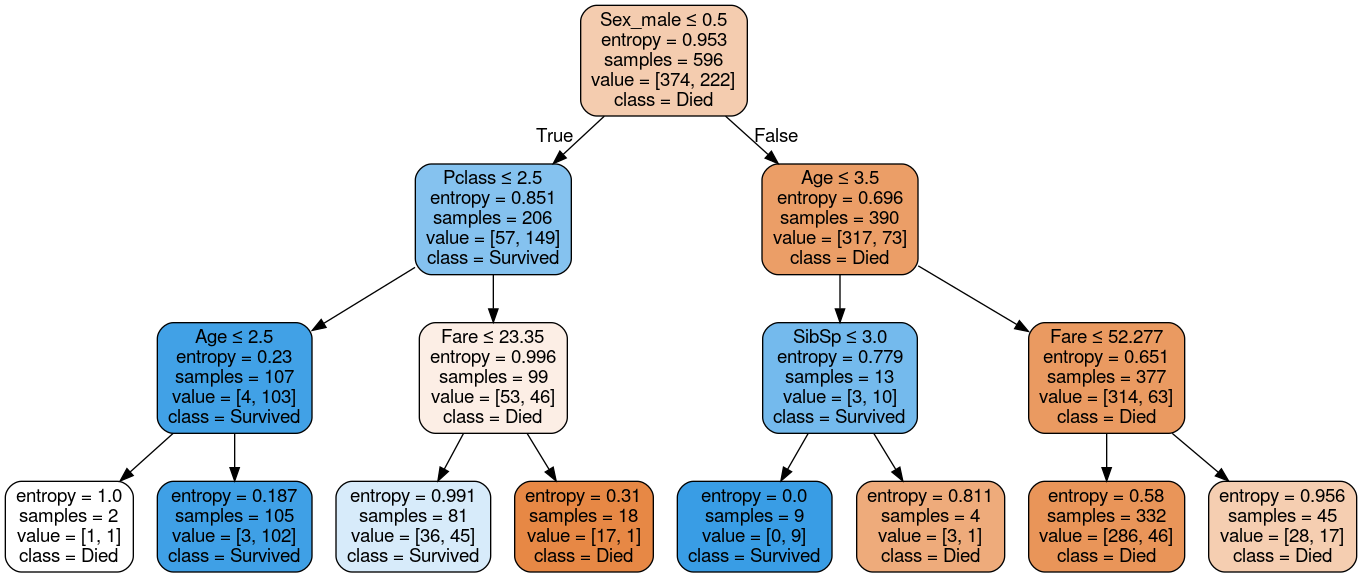

In [2]:
from sklearn.model_selection import train_test_split
from IPython.display import Image
import pydotplus

titanic_data = pd.read_csv('train.csv')
x = titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = titanic_data.Survived
x = pd.get_dummies(x)
x = x.fillna({'Age': x.Age.median()})
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf.fit(x_train, y_train)

dot_data = tree.export_graphviz(clf, out_file=None, feature_names=list(x),
                     class_names = ['Died', 'Survived'],
                     filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

Using minimum samples split and leaf options in grid search:

In [3]:
from sklearn.model_selection import GridSearchCV

In [4]:
search = GridSearchCV(
    estimator = tree.DecisionTreeClassifier(),
    param_grid = {
        'criterion': ('gini', 'entropy'),
        'max_depth': range(1, 11),
        'min_samples_split': range(5, 51, 5),
        'min_samples_leaf': range(5, 51, 5)
    },
    cv=10,
    n_jobs=8,
    iid=False
)

In [5]:
search.fit(x_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid=False, n_jobs=8,
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': range(1, 11),
                         'mi

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 5}


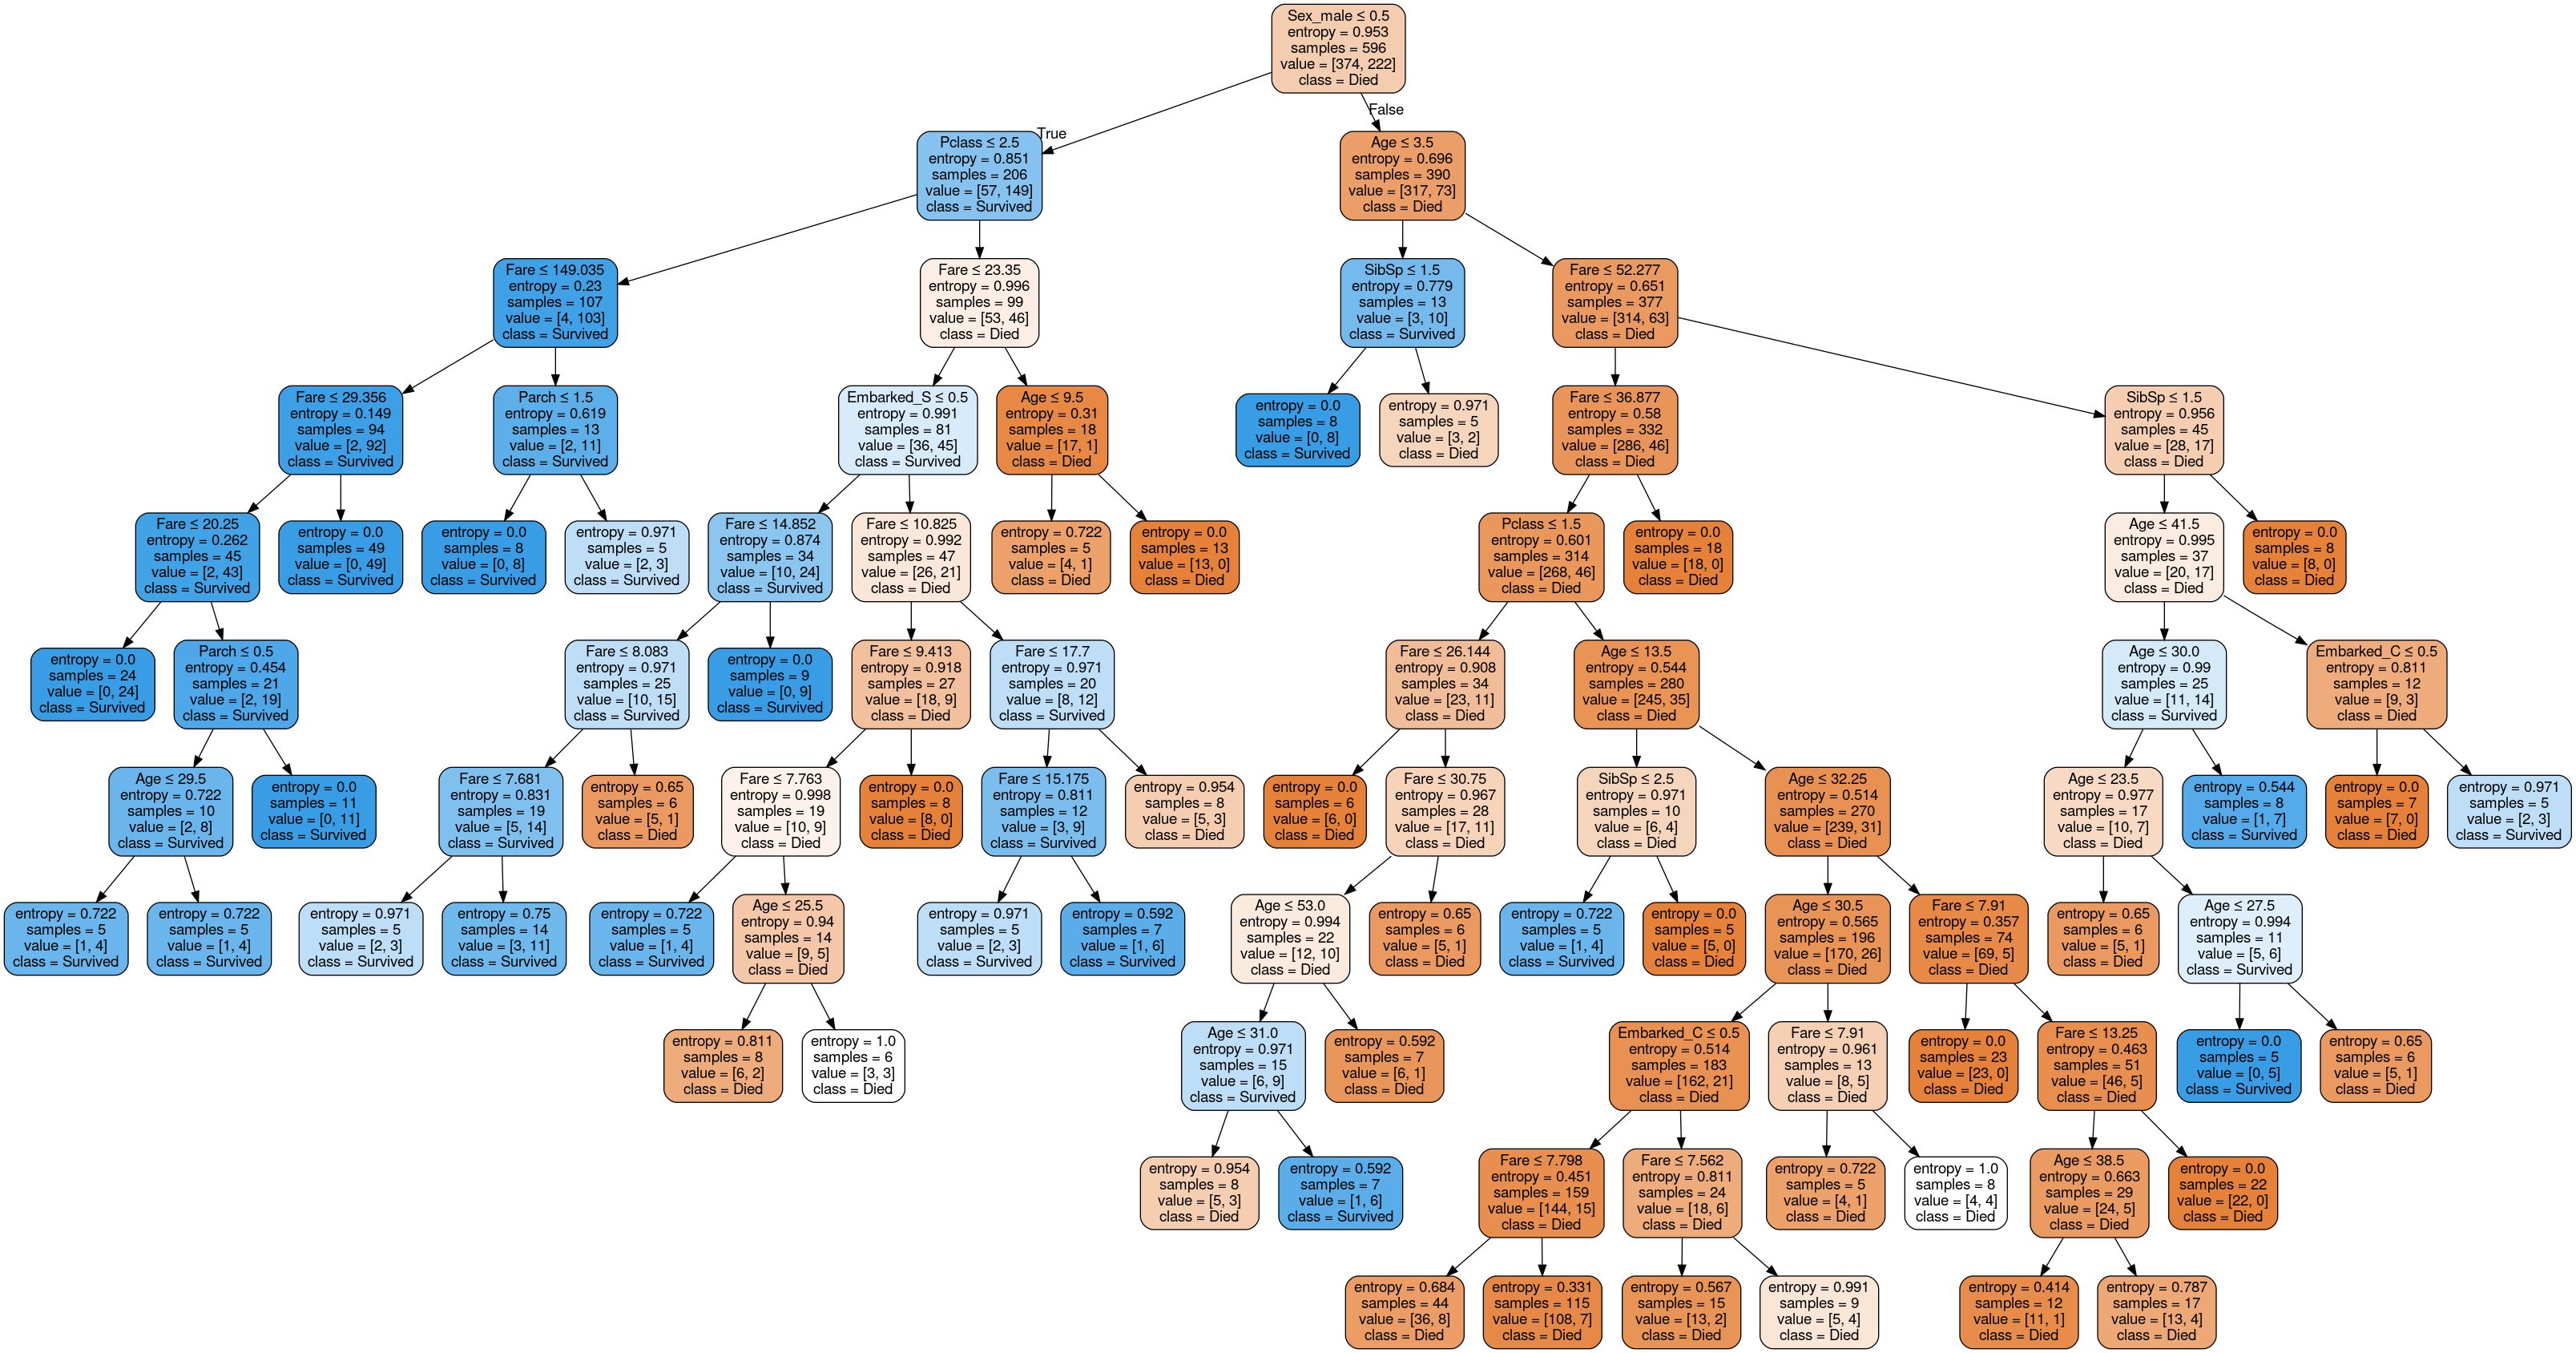

In [6]:
print(search.best_params_)
best_clf = search.best_estimator_
dot_data = tree.export_graphviz(best_clf, out_file=None, feature_names=list(x),
                     class_names = ['Died', 'Survived'],
                     filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [7]:
best_clf.score(x_test, y_test)

0.8135593220338984

In [8]:
from sklearn.ensemble import RandomForestClassifier

Task on Random Forest:

In [9]:
rf = RandomForestClassifier(n_estimators=15, max_depth=5)
rf.fit(x_train, y_train)
predictions = rf.predict(x_test)

In [10]:
search_rf = GridSearchCV(
    estimator = RandomForestClassifier(),
    param_grid = {
        'n_estimators': range(10, 101, 10),
        'max_depth': (2, 5, 7, 10)
    },
    cv=5,
    n_jobs=8,
    iid=False
)

In [11]:
search_rf.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [12]:
print(search_rf.best_params_)
best_clf_rf = search_rf.best_estimator_
best_clf_rf.score(x_test, y_test)

{'max_depth': 5, 'n_estimators': 90}


0.8101694915254237

In [13]:
feature_importances = best_clf_rf.feature_importances_

In [14]:
feature_importances_df = pd.DataFrame({
    'feature': list(x_train),
    'feature_importance': feature_importances
})

In [15]:
feature_importances_df.sort_values('feature_importance', ascending=False)

,feature,feature_importance
6,Sex_male,0.254908
5,Sex_female,0.237885
4,Fare,0.138821
0,Pclass,0.135420
1,Age,0.113273
2,SibSp,0.035179
3,Parch,0.030539
7,Embarked_C,0.023963
9,Embarked_S,0.019871
8,Embarked_Q,0.010142


Task on feature importances:

In [16]:
heart = pd.read_csv('heart.csv')
print(heart.shape)
heart.head()

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


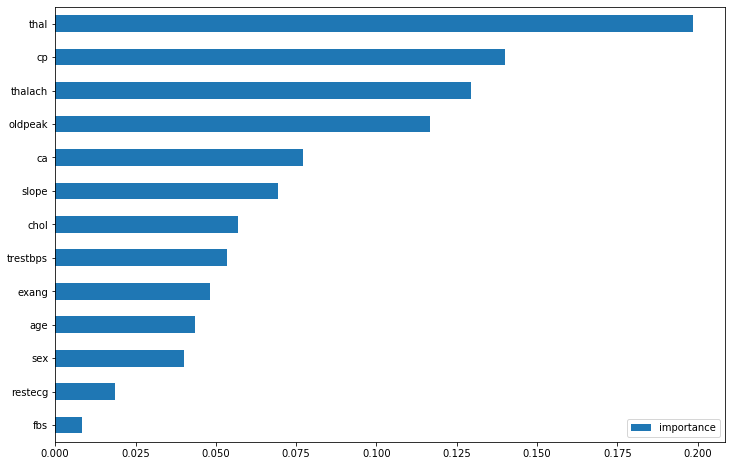

In [17]:
np.random.seed(0)
rf = RandomForestClassifier(n_estimators=10, max_depth=5)

xt, yt = heart.drop('target', axis=1), heart.target
rf.fit(xt, yt)

imp = pd.DataFrame(rf.feature_importances_, index=xt.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

Task on mushrooms data:

In [18]:
mush = pd.read_csv('https://stepik.org/media/attachments/course/4852/training_mush.csv')
print(mush.shape)
mush.head()

(6093, 23)


,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,2,0,3,1,5,1,0,0,9,1,...,3,7,0,2,1,4,3,5,0,0
1,2,0,4,0,5,1,0,1,10,0,...,7,4,0,2,1,0,7,4,0,1
2,2,0,3,0,2,1,0,0,7,0,...,0,4,0,2,1,2,1,5,1,1
3,0,0,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0
4,2,3,3,1,5,1,0,0,10,1,...,3,6,0,2,1,4,2,5,0,0


In [19]:
search_rf = GridSearchCV(
    estimator = RandomForestClassifier(random_state=0),
    param_grid = {
        'n_estimators': range(10, 51, 10),
        'max_depth': range(1, 12, 2),
        'min_samples_leaf': range(1, 8),
        'min_samples_split': range(2, 9, 2)
    },
    cv=3,
    n_jobs=8,
    iid=False
)

In [20]:
search_rf.fit(mush.drop('class', axis=1), mush['class'])

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=0,
                                              verbose=0, warm_start=False),
             iid=False, n_jobs=8,
             param_grid={'max_d

In [21]:
best_clf_rf = search_rf.best_estimator_
search_rf.best_params_

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

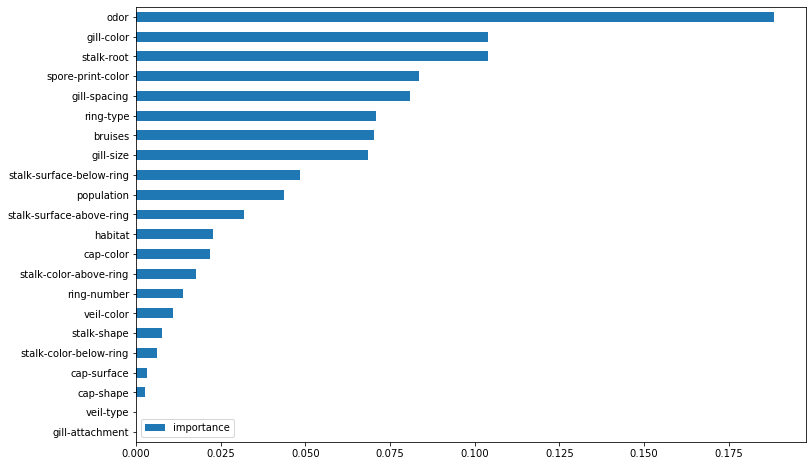

In [22]:
pd.DataFrame(best_clf_rf.feature_importances_,
             index=mush.drop('class', axis=1).columns,
             columns=['importance']
).sort_values('importance').plot(kind='barh', figsize=(12, 8))
plt.show()

In [23]:
y_pred = best_clf_rf.predict(
    pd.read_csv('https://stepik.org/media/attachments/course/4852/testing_mush.csv')
)
y_pred.sum()

976

In [24]:
from sklearn.metrics import confusion_matrix

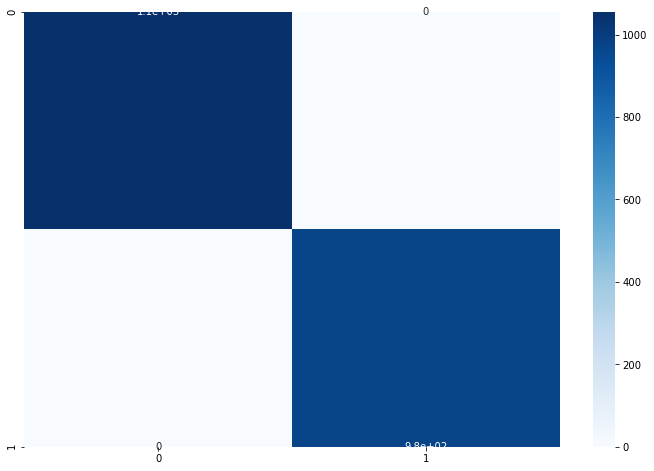

In [25]:
cm = confusion_matrix(
    pd.read_csv('testing_y_mush.csv'),
    y_pred
)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.show()

Task on invasion data:

In [26]:
inv = pd.read_csv('https://stepik.org/media/attachments/course/4852/invasion.csv')
print(inv.shape)
inv.head()

(500, 7)


,class,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,transport,2.190672,6.716633,62.168208,0.347465,158221,44.932446
1,transport,3.453276,8.995909,62.994707,0.590094,385972,41.568300
2,transport,2.432994,6.938691,62.245807,0.329288,446482,40.123467
3,fighter,6.083763,3.019459,18.474555,0.174738,210125,11.384865
4,fighter,12.876769,2.452950,195.805771,0.150446,23109,11.328806


In [27]:
search_rf = GridSearchCV(
    estimator = RandomForestClassifier(),
    param_grid = {
        'n_estimators': range(10, 51, 10),
        'max_depth': range(1, 12, 2),
        'min_samples_leaf': range(1, 8),
        'min_samples_split': range(2, 9, 2)
    },
    cv=5,
    n_jobs=8,
    iid=False
)

In [28]:
x_inv, y_inv = inv.drop('class', axis=1), inv['class']

In [29]:
search_rf.fit(x_inv, y_inv)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [30]:
best_clf_rf = search_rf.best_estimator_

In [31]:
new_inv = pd.read_csv('https://stepik.org/media/attachments/course/4852/operative_information.csv')
print(new_inv.shape)
new_inv.head()

(1500, 6)


,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,7.516543,3.916691,513.954279,0.177247,105908,13.267224
1,4.322988,6.967689,63.752970,0.545922,277855,39.833130
2,4.595724,9.098297,62.233948,0.389201,160662,42.014556
3,2.689675,7.964869,62.475495,0.541081,162092,42.056829
4,8.075576,5.169719,336.441261,0.174757,466853,11.779813


In [32]:
y_pred = best_clf_rf.predict(new_inv)

In [33]:
pd.Series(y_pred).value_counts()

fighter      675
transport    595
cruiser      230
dtype: int64

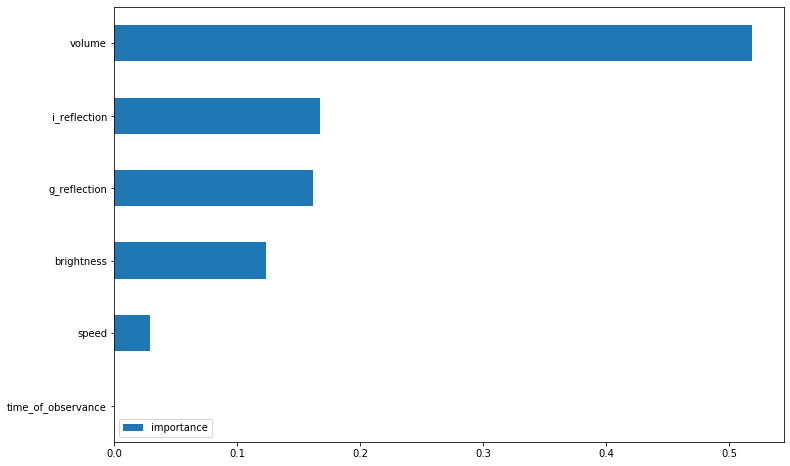

In [34]:
pd.DataFrame(best_clf_rf.feature_importances_,
             index=x_inv.columns,
             columns=['importance']
).sort_values('importance').plot(kind='barh', figsize=(12, 8))
plt.show()

Task on dangerous regions of space:

In [35]:
drs = pd.read_csv('https://stepik.org/media/attachments/course/4852/space_can_be_a_dangerous_place.csv')
print(drs.shape)
drs.head()

(100000, 8)


,r,phi,peradventure_index,dustiness,black_hole_is_near,buggers_were_noticed,nearby_system_has_planemo,dangerous
0,169.1,138.0,22.3212,0.706285,0,1,1,1
1,11.1,148.0,1.4652,-0.410512,1,1,1,1
2,274.6,201.0,36.2472,0.756457,1,1,1,1
3,172.8,173.0,22.8096,0.035221,1,1,1,1
4,223.3,222.0,29.4756,0.197271,0,1,1,1


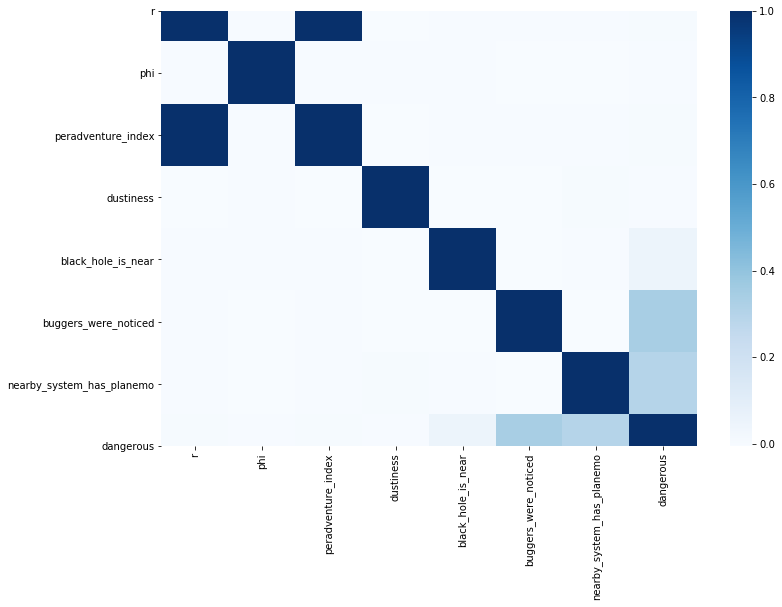

In [36]:
plt.figure(figsize=(12, 8))
sns.heatmap(drs.corr(), cmap='Blues')
plt.show()

### Pandas tricks

In [37]:
movie = pd.read_csv('movie_metadata.csv')
print(movie.columns)
movie.head()

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [38]:
genres = movie[['movie_title', 'genres']]
genres

,movie_title,genres
0,Avatar,Action|Adventure|Fantasy|Sci-Fi
1,Pirates of the Caribbean: At World's End,Action|Adventure|Fantasy
2,Spectre,Action|Adventure|Thriller
3,The Dark Knight Rises,Action|Thriller
4,Star Wars: Episode VII - The Force Awakens ...,Documentary
...,...,...
5038,Signed Sealed Delivered,Comedy|Drama
5039,The Following,Crime|Drama|Mystery|Thriller
5040,A Plague So Pleasant,Drama|Horror|Thriller
5041,Shanghai Calling,Comedy|Drama|Romance


In [39]:
def reversator(value):
    return value[::-1]

In [40]:
for row in genres.values[:10]:
    for value in row:
        print(reversator(value))

 ratavA
iF-icS|ysatnaF|erutnevdA|noitcA
 dnE s'dlroW tA :naebbiraC eht fo setariP
ysatnaF|erutnevdA|noitcA
 ertcepS
rellirhT|erutnevdA|noitcA
 sesiR thginK kraD ehT
rellirhT|noitcA
             snekawA ecroF ehT - IIV edosipE :sraW ratS
yratnemucoD
 retraC nhoJ
iF-icS|erutnevdA|noitcA
 3 naM-redipS
ecnamoR|erutnevdA|noitcA
 delgnaT
ecnamoR|lacisuM|ysatnaF|ylimaF|ydemoC|noitaminA|erutnevdA
 nortlU fo egA :sregnevA
iF-icS|erutnevdA|noitcA
 ecnirP doolB-flaH eht dna rettoP yrraH
yretsyM|ysatnaF|ylimaF|erutnevdA


In [41]:
genres.iloc[:10]

,movie_title,genres
0,Avatar,Action|Adventure|Fantasy|Sci-Fi
1,Pirates of the Caribbean: At World's End,Action|Adventure|Fantasy
2,Spectre,Action|Adventure|Thriller
3,The Dark Knight Rises,Action|Thriller
4,Star Wars: Episode VII - The Force Awakens ...,Documentary
5,John Carter,Action|Adventure|Sci-Fi
6,Spider-Man 3,Action|Adventure|Romance
7,Tangled,Adventure|Animation|Comedy|Family|Fantasy|Musi...
8,Avengers: Age of Ultron,Action|Adventure|Sci-Fi
9,Harry Potter and the Half-Blood Prince,Adventure|Family|Fantasy|Mystery


In [42]:
for i, row in genres.iloc[:10].iterrows():
    print(row.map(reversator))

movie_title                             ratavA
genres         iF-icS|ysatnaF|erutnevdA|noitcA
Name: 0, dtype: object
movie_title     dnE s'dlroW tA :naebbiraC eht fo setariP
genres                          ysatnaF|erutnevdA|noitcA
Name: 1, dtype: object
movie_title                      ertcepS
genres         rellirhT|erutnevdA|noitcA
Name: 2, dtype: object
movie_title     sesiR thginK kraD ehT
genres                rellirhT|noitcA
Name: 3, dtype: object
movie_title                 snekawA ecroF ehT - IIV edosipE :...
genres                                               yratnemucoD
Name: 4, dtype: object
movie_title                retraC nhoJ
genres         iF-icS|erutnevdA|noitcA
Name: 5, dtype: object
movie_title                3 naM-redipS
genres         ecnamoR|erutnevdA|noitcA
Name: 6, dtype: object
movie_title                                              delgnaT
genres         ecnamoR|lacisuM|ysatnaF|ylimaF|ydemoC|noitamin...
Name: 7, dtype: object
movie_title     nortlU fo egA :s

In [43]:
for i, col in genres.iteritems():
    print(col.map(reversator))

0                                                  ratavA
1                dnE s'dlroW tA :naebbiraC eht fo setariP
2                                                 ertcepS
3                                   sesiR thginK kraD ehT
4                    snekawA ecroF ehT - IIV edosipE :...
                              ...                        
5038                              derevileD delaeS dengiS
5039                                        gniwolloF ehT
5040                                 tnasaelP oS eugalP A
5041                                     gnillaC iahgnahS
5042                                    werD htiw etaD yM
Name: movie_title, Length: 5043, dtype: object
0       iF-icS|ysatnaF|erutnevdA|noitcA
1              ysatnaF|erutnevdA|noitcA
2             rellirhT|erutnevdA|noitcA
3                       rellirhT|noitcA
4                           yratnemucoD
                     ...               
5038                       amarD|ydemoC
5039       rellirhT|yretsyM|amarD|e

In [44]:
budget = movie[['budget', 'duration']]
budget.head()

,budget,duration
0,237000000.0,178.0
1,300000000.0,169.0
2,245000000.0,148.0
3,250000000.0,164.0
4,NaN,NaN


In [45]:
%%timeit
budget.applymap(lambda x: x + 1)

3.52 ms ± 42.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [46]:
%%timeit
budget.apply(lambda x: x + 1, axis=0)

1.23 ms ± 27.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [47]:
%%timeit
budget.transform(lambda x: x + 1)

1.2 ms ± 11.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [48]:
def mm(col):
    return np.mean(col) + 1

In [49]:
%%timeit
budget.apply(mm)

729 µs ± 7.73 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [50]:
%%timeit
budget.mean() + 1

428 µs ± 916 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [51]:
%%timeit
np.mean(budget.dropna().values)

993 µs ± 19.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [52]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/iris.csv')

In [53]:
%%timeit
df.mean(axis=0)

222 µs ± 5.61 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [54]:
%%timeit
df.describe().loc['mean']

10.8 ms ± 85.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [55]:
%%timeit
df.apply('mean')

279 µs ± 5.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [56]:
%%timeit
df.apply(np.mean)

1.2 ms ± 54.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [57]:
stock = pd.read_csv('https://raw.githubusercontent.com/PacktPublishing/Pandas-Cookbook/master/data/amzn_stock.csv',
                   index_col='Date', parse_dates=True)
stock.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,136.25,136.61,133.14,133.90,7600543
2010-01-05,133.43,135.48,131.81,134.69,8856456
2010-01-06,134.60,134.73,131.65,132.25,7180977
2010-01-07,132.01,132.32,128.80,130.00,11030124
2010-01-08,130.56,133.68,129.03,133.52,9833829


In [58]:
stock.index

DatetimeIndex(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
               '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13',
               '2010-01-14', '2010-01-15',
               ...
               '2017-07-03', '2017-07-05', '2017-07-06', '2017-07-07',
               '2017-07-10', '2017-07-11', '2017-07-12', '2017-07-13',
               '2017-07-14', '2017-07-17'],
              dtype='datetime64[ns]', name='Date', length=1896, freq=None)

In [59]:
stock['2010-02':'2011-03']

,Open,High,Low,Close,Volume
Date,,,,,
2010-02-01,123.18,124.86,113.82,118.87,37774317
2010-02-02,118.79,118.98,114.40,118.12,23084986
2010-02-03,117.12,119.61,116.56,119.10,12409012
2010-02-04,118.64,120.33,115.74,115.94,12783912
2010-02-05,115.88,117.65,114.10,117.39,11027086
...,...,...,...,...,...
2011-03-25,171.64,173.49,170.30,170.98,4294302
2011-03-28,171.80,172.50,169.25,169.35,3400936
2011-03-29,170.73,174.84,170.07,174.62,4887443


In [60]:
stock.resample('2h').asfreq()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04 00:00:00,136.25,136.61,133.14,133.90,7600543.0
2010-01-04 02:00:00,NaN,NaN,NaN,NaN,NaN
2010-01-04 04:00:00,NaN,NaN,NaN,NaN,NaN
2010-01-04 06:00:00,NaN,NaN,NaN,NaN,NaN
2010-01-04 08:00:00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2017-07-16 16:00:00,NaN,NaN,NaN,NaN,NaN
2017-07-16 18:00:00,NaN,NaN,NaN,NaN,NaN
2017-07-16 20:00:00,NaN,NaN,NaN,NaN,NaN


In [61]:
stock.resample('1w').mean()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-10,133.3700,134.564,130.8860,132.872,8900385.80
2010-01-17,129.5660,130.472,126.9940,128.252,10756782.40
2010-01-24,126.5475,128.255,123.7925,125.360,9883903.25
2010-01-31,123.5780,125.528,120.5840,122.796,18627194.20
2010-02-07,118.7220,120.286,114.9240,117.884,19415862.60
...,...,...,...,...,...
2017-06-25,1003.6940,1007.236,993.9580,999.006,3435057.40
2017-07-02,987.3720,994.062,974.0140,981.004,3719885.20
2017-07-09,967.1325,976.000,958.6025,967.240,3116265.75


In [62]:
stock.head(10)

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,136.25,136.61,133.14,133.90,7600543
2010-01-05,133.43,135.48,131.81,134.69,8856456
2010-01-06,134.60,134.73,131.65,132.25,7180977
2010-01-07,132.01,132.32,128.80,130.00,11030124
2010-01-08,130.56,133.68,129.03,133.52,9833829
2010-01-11,132.62,132.80,129.21,130.31,8786668
2010-01-12,128.99,129.82,126.55,127.35,9098190
2010-01-13,127.90,129.71,125.75,129.11,10727856
2010-01-14,129.14,130.38,126.40,127.35,9788435


In [63]:
stock.rolling(3).mean()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN
2010-01-05,NaN,NaN,NaN,NaN,NaN
2010-01-06,134.760000,135.606667,132.200000,133.613333,7.879325e+06
2010-01-07,133.346667,134.176667,130.753333,132.313333,9.022519e+06
2010-01-08,132.390000,133.576667,129.826667,131.923333,9.348310e+06
...,...,...,...,...,...
2017-07-11,982.516667,991.846667,978.786667,989.786667,3.057460e+06
2017-07-12,992.883333,1001.326667,988.440000,999.036667,3.379189e+06
2017-07-13,999.423333,1003.806667,992.573333,1000.423333,3.157356e+06


In [64]:
stock.rolling(3, min_periods=1).mean()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,136.250000,136.610000,133.140000,133.900000,7.600543e+06
2010-01-05,134.840000,136.045000,132.475000,134.295000,8.228500e+06
2010-01-06,134.760000,135.606667,132.200000,133.613333,7.879325e+06
2010-01-07,133.346667,134.176667,130.753333,132.313333,9.022519e+06
2010-01-08,132.390000,133.576667,129.826667,131.923333,9.348310e+06
...,...,...,...,...,...
2017-07-11,982.516667,991.846667,978.786667,989.786667,3.057460e+06
2017-07-12,992.883333,1001.326667,988.440000,999.036667,3.379189e+06
2017-07-13,999.423333,1003.806667,992.573333,1000.423333,3.157356e+06


In [65]:
stock.expanding().mean()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,136.250000,136.610000,133.140000,133.900000,7.600543e+06
2010-01-05,134.840000,136.045000,132.475000,134.295000,8.228500e+06
2010-01-06,134.760000,135.606667,132.200000,133.613333,7.879325e+06
2010-01-07,134.072500,134.785000,131.350000,132.710000,8.667025e+06
2010-01-08,133.370000,134.564000,130.886000,132.872000,8.900386e+06
...,...,...,...,...,...
2017-07-11,376.749450,380.480122,372.654524,376.793171,4.534246e+06
2017-07-12,377.079033,380.811907,372.984923,377.125827,4.533757e+06
2017-07-13,377.410364,381.142460,373.313812,377.455026,4.532884e+06


In [66]:
stock.expanding(3).mean()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN
2010-01-05,NaN,NaN,NaN,NaN,NaN
2010-01-06,134.760000,135.606667,132.200000,133.613333,7.879325e+06
2010-01-07,134.072500,134.785000,131.350000,132.710000,8.667025e+06
2010-01-08,133.370000,134.564000,130.886000,132.872000,8.900386e+06
...,...,...,...,...,...
2017-07-11,376.749450,380.480122,372.654524,376.793171,4.534246e+06
2017-07-12,377.079033,380.811907,372.984923,377.125827,4.533757e+06
2017-07-13,377.410364,381.142460,373.313812,377.455026,4.532884e+06


In [67]:
stock.ewm(alpha=0.7).mean()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,136.250000,136.610000,133.140000,133.900000,7.600543e+06
2010-01-05,134.080769,135.740769,132.116923,134.507692,8.566630e+06
2010-01-06,134.454317,135.013597,131.781007,132.883453,7.569757e+06
2010-01-07,132.729323,133.112682,129.677262,130.848553,1.001179e+07
2010-01-08,131.207098,133.510772,129.223075,132.723121,9.886915e+06
...,...,...,...,...,...
2017-07-11,989.084881,995.142613,982.059585,992.890941,3.089057e+06
2017-07-12,997.180464,1004.527784,993.287876,1002.424282,3.452719e+06
2017-07-13,1002.388139,1006.174335,995.116363,1001.168285,3.052354e+06


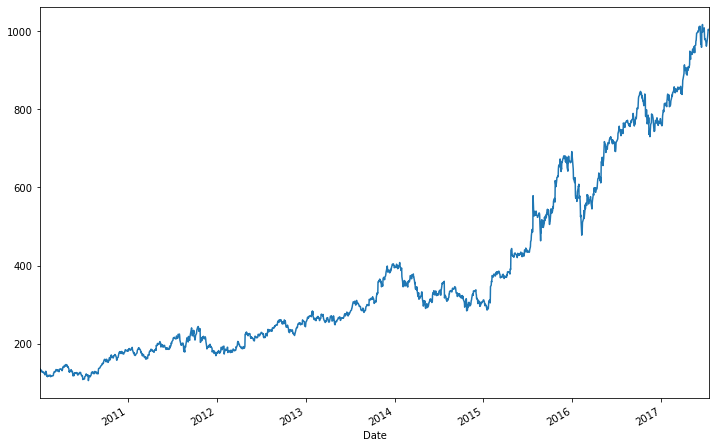

In [68]:
stock['Open'].plot(figsize=(12, 8))
plt.show()

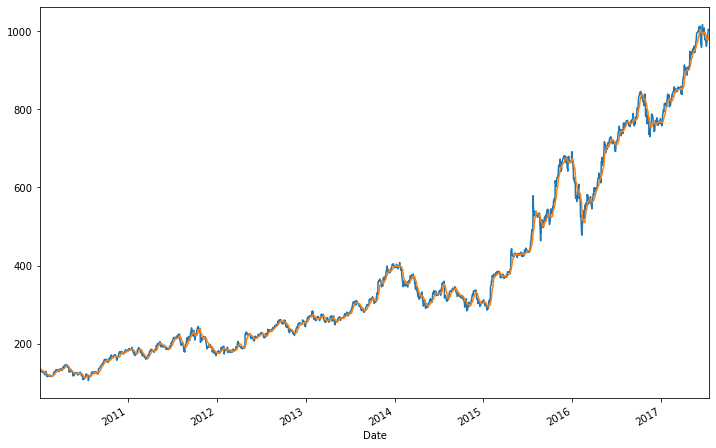

In [69]:
ns = stock['Open'].rolling(10, min_periods=1).mean()
stock['Open'].plot(figsize=(12, 8))
ns.plot(figsize=(12, 8))
plt.show()

In [70]:
stock.index.weekday_name.value_counts()

Wednesday    390
Tuesday      389
Thursday     382
Friday       380
Monday       355
Name: Date, dtype: int64

In [71]:
stock.index.weekofyear

Int64Index([ 1,  1,  1,  1,  1,  2,  2,  2,  2,  2,
            ...
            27, 27, 27, 27, 28, 28, 28, 28, 28, 29],
           dtype='int64', name='Date', length=1896)